# Домашняя работа №2

In [175]:
import numpy as np
from scipy.optimize import approx_fprime
import pylab
from scipy.misc import derivative
import matplotlib.pyplot as plt
from scipy.optimize import minimize

### Задание 1

Придумайте функции со следующими свойствами (в a) b) c) область определения X любая, какая вам удобна, главное - функция с нужными свойствами):

a) бесконечное количество локальных экстремумов

b) 2 локальных экстремума

с) 3 локальных экстремума

d*) область определения функции - 1 точка

### a) бесконечное количество локальных экстремумов

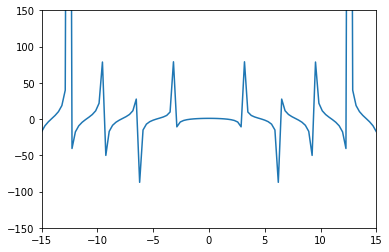

In [101]:

def f(x):
    return  x / np.tan(x)    
#     return -1 * np.sin(x)
#      return -1 * x*np.sin(x)+x


x = np.linspace(-15,15,100)
y = f(x)
pylab.plot(x,y)


pylab.axis([-15,15,-150,150])
pylab.show()

### b) 2 локальных экстремума

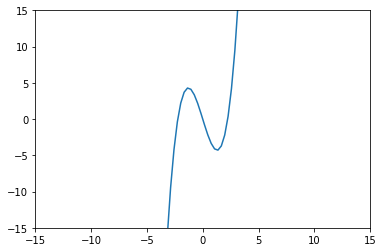

In [42]:
def f(x):
    return x**3-5*x

x = np.linspace(-15,15,100)
y = f(x)
pylab.plot(x,y)


pylab.axis([-15,15,-15,15])
pylab.show()

### с) 3 локальных экстремума

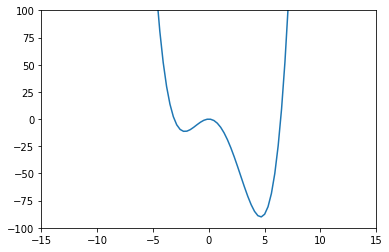

In [119]:
def f(x):
    return  0.3*x**4-1*x**3-6*x**2

x = np.linspace(-15,15,100)
y = f(x)
pylab.plot(x,y)


pylab.axis([-15,15,-100,100])
pylab.show()

### d*) область определения функции - 1 точка

In [89]:
def f(x):  
    return 1/0**x

# ф-ция существует только в точке x == 0.

In [87]:
0**0

1

In [122]:
0**0.1

0.0

### Задание 2

Посчитайте 1-ую и 2-ую производные функции (на бумажке):

$f(x) = sin^2(2x+1)$


### первая производная

$(sin^2(2x+1))' = 2sin(2x+1)*(sin(2x+1))' = 2sin(2x+1)*cos(2x+1)*(2x+1)' = 2sin(2x+1)cos(2x+1)*2 $
$= 4sin(2x+1)cos(2x+1)$

### вторая производная

$(sin^2(2x+1))'' = (4sin(2x+1)cos(2x+1))' = $
$ 4*( (sin(2x+1)'*cos(2x+1) + sin(2x+1)*(cos(2x+1))' ) = $
$ 4*( 2cos(2x+1)*cos(2x+1) + sin(2x+1)(-2sin(2x+1) = $

$ = 8 cos^2(2x+1) - 8 sin^2(2x+1)$

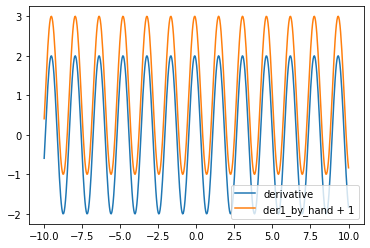

In [166]:
# ф-ция
def f(x):
    return  np.sin(2*x+1)**2

# первая производная
def der1(x):
    return 4*np.sin(2*x+1)*np.cos(2*x+1)

# вторая производная
def der2(x):
    return 8*(np.cos(2*x+1))**2 - 8 * (np.sin(2*x+1))**2



x = np.linspace(-10, 10, 500)
fx = f(x)
f1x = [derivative(f, xx, dx=1e-6, n=1) for xx in x] # расчетная производная
fd1x = [1+der1(xx) for xx in x] # выведенная производная, смещенная на 1 ввер (для наглядности)

# plt.plot(x, fx, label='function')
plt.plot(x, f1x, label='derivative')
plt.plot(x, fd1x, label='der1_by_hand + 1')
plt.legend()
plt.show()

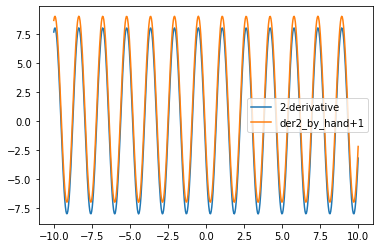

In [167]:
# f2x = [derivative(der1, xx, dx=1e-6, n=1) for xx in x] # расчетная вторая производная
f2x = [derivative(f, xx, dx=1e-6, n=2) for xx in x] # расчетная вторая производная
fd2x = [1+der2(xx) for xx in x] # выведенная вторая производная, смещенная на 1 ввер (для наглядности)

plt.plot(x, f2x, label='2-derivative')
plt.plot(x, fd2x, label='der2_by_hand+1')
plt.legend()
plt.show()

### Задание 3: 
Посчитайте частные производные функции в точкe
(на бумажке или в LaTeX и на numpy):

$f(x,y)=2x^2y^3 + 1/x + y^2x + 7$ в точке $(1,2)$

$ f'_x = 2*2xy^3 - \frac{1}{x^2}+y^2$

$ f'_y = 2*3x^2y^2 + 2xy$

$ f'_x(1, 2) = 2*2*1*2^3 - \frac{1}{1^2}+2^2 = 4*8 - 1 + 4 = 35$

$ f'_y(1, 2) = 2*3*1^2*2^2 + 2*1*2 = 6*4 + 4 = 28$

In [163]:
import sympy 

x, y = sympy.symbols('x y')

sympy.diff(2*(x**2)*(y**3) + (x ** (-1)) + (y**2)*x + 7, x)

4*x*y**3 + y**2 - 1/x**2

In [164]:
sympy.diff(2*(x**2)*(y**3) + (x ** (-1)) + (y**2)*x + 7, y)

6*x**2*y**2 + 2*x*y

In [172]:
def func(x):
    return 2*(x[0]**2)*(x[1]**3) + (x[0] ** (-1)) + (x[1]**2)*x[0] + 7

x = np.array([1.,2.])
eps = np.sqrt(np.finfo(float).eps)
approx_fprime(x, func, [eps, eps])

array([35.00000024, 28.00000024])

### Задание 4:

Градиентный спуск своими руками

In [177]:
def f(x):
    return (x[0]**2) + (x[1]**2) 

In [179]:
x = np.array([100, 200])
lr = 0.1

In [181]:
x

array([100, 200])

In [206]:
x = np.array([100, 200])
f_old = f(x)
step = 0.1
eps = np.sqrt(np.finfo(float).eps)
for i in range(100):
# for i in range(2):
    # Calculate gradient 
    grad = approx_fprime(x, f, [eps, eps])
    new_x = grad*lr
#     print(grad, x, new_x,f(new_x))
    
#     if abs(f(new_x) - f_old) < 0.0001: # stop criteria
#         break
        
    
# Update x with gradient    
    x = new_x
    f_old = f(x)
print(f'Найденный минимум f = {f_old:.8f} при x = {x}')
    
    
#     x = # Your code here (смотри слайд презентации про градиентный спуск)

Найденный минимум f = 0.00000000 при x = [1.52052665e-10 1.52052665e-10]


In [207]:
print("Минимум достигается в: ", x)
print("Значение функции в минимуме: ", f(x))

Минимум достигается в:  [1.52052665e-10 1.52052665e-10]
Значение функции в минимуме:  4.6240026015208497e-20


Проверка с помощью встроенной функции scipy: 

In [196]:
res = minimize(f, [100,200], method='nelder-mead', options={'xtol': 1e-6, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 72
         Function evaluations: 138
